# Proyek Analisis Data: Air Quality Dataset
## Nama : Ni Putu Dian Astutik
## Email : dianastutik03@gmail.com
## ID Dicoding : dian_astutik

# Pertanyaan Bisnis:
## 1. Bagaimana tren kualitas udara di Beijing berdasarkan paremeter CO?
## 2. Kapan waktu kualitas udara di Beijing terburuk berdasarkan parameter CO?
## 3. Kapan waktu kualitas udara di Beijing terbaik berdasarkan parameter CO?
## 4. Distrik mana di Beijing yang memiliki kadar CO terendah?

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Data Wrangling

### Gathering Data

In [32]:
df = pd.DataFrame()
for root, dir, files in os.walk("air-quality-dataset"):
    for file in files:
        sub_df = pd.read_csv(os.path.join(root, file))
        df = pd.concat([df, sub_df])
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


### Assessing Data

In [33]:
df.info()
df.isna().sum() 
print("Jumlah duplikasi: ", df.duplicated().sum())
df.describe()
df.wd.value_counts()

<class 'pandas.core.frame.DataFrame'>
Index: 420768 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 61.0+ MB
Jumlah duplikasi:  0


wd
NE     43335
ENE    34142
NW     32600
N      30869
E      29752
SW     28756
NNE    28232
NNW    25326
WNW    24375
ESE    24220
SSW    22563
SE     20074
WSW    20040
S      19405
SSE    17694
W      17563
Name: count, dtype: int64

### Cleaning Data

In [34]:
#missing value: PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, WSPM
df["PM2.5"].fillna(value=55, inplace=True)
df["PM10"].fillna(value=82, inplace=True)
df["SO2"].fillna(value=7, inplace=True)
df["NO2"].fillna(value=43, inplace=True)
df["CO"].fillna(value=900, inplace=True)
df["O3"].fillna(value=45, inplace=True)
df["TEMP"].fillna(value=13.538976, inplace=True)
df["PRES"].fillna(value=1010.746982, inplace=True)
df["DEWP"].fillna(value=2.490822, inplace=True)
df["RAIN"].fillna(value=0.064476, inplace=True)
df["WSPM"].fillna(value=1.729711, inplace=True)
df.wd.fillna(value="NE", inplace=True)

C:\Users\Dian\AppData\Local\Temp\ipykernel_19152\4088207010.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["PM2.5"].fillna(value=55, inplace=True)
C:\Users\Dian\AppData\Local\Temp\ipykernel_19152\4088207010.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

In [35]:
df.isna().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420768 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    420768 non-null  float64
 6   PM10     420768 non-null  float64
 7   SO2      420768 non-null  float64
 8   NO2      420768 non-null  float64
 9   CO       420768 non-null  float64
 10  O3       420768 non-null  float64
 11  TEMP     420768 non-null  float64
 12  PRES     420768 non-null  float64
 13  DEWP     420768 non-null  float64
 14  RAIN     420768 non-null  float64
 15  wd       420768 non-null  object 
 16  WSPM     420768 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 61.0+ MB


# Exploratory Data Analysis

In [36]:
df.describe(include="all")
df.groupby(by="station").agg({
    "PM2.5": ["mean", "max", "min"],
    "PM10": ["mean", "max", "min"],
    "SO2": ["mean", "max", "min"],
    "NO2": ["mean", "max", "min"],
    "CO": ["mean", "max", "min"],
    "O3": ["mean", "max", "min"]
})

df.groupby(by="hour")["CO"].mean().sort_values(ascending=False)
df.groupby(by="station")["CO"].mean().sort_values(ascending=False)

station
Wanshouxigong    1352.995351
Nongzhanguan     1309.754991
Gucheng          1307.034309
Wanliu           1297.682609
Dongsi           1290.857090
Tiantan          1285.512720
Guanyuan         1252.731776
Aotizhongxin     1244.561887
Shunyi           1169.233003
Changping        1141.357061
Huairou          1017.584417
Dingling          904.615132
Name: CO, dtype: float64

# Visualization and Explanatory Analysis

## Pertanyaan 1: Bagaimana tren kualitas udara di Beijing berdasarkan parameter CO?

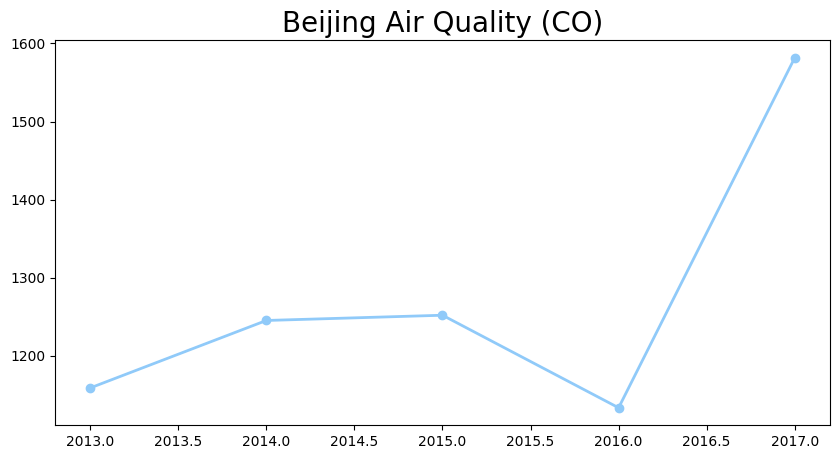

In [37]:
plt.figure(figsize=(10,5))
plt.plot(
    df.groupby(by="year")["CO"].mean().sort_index(ascending=True),
    marker='o', 
    linewidth=2,
    color="#90CAF9"
)
plt.title("Beijing Air Quality (CO)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()



## Pertanyaan 2: Kapan waktu kualitas udara di Beijing terburuk berdasarkan parameter CO?
## Pertanyaan 3: Kapan waktu kualitas udara di Beijing terbaik berdasarkan parameter CO?

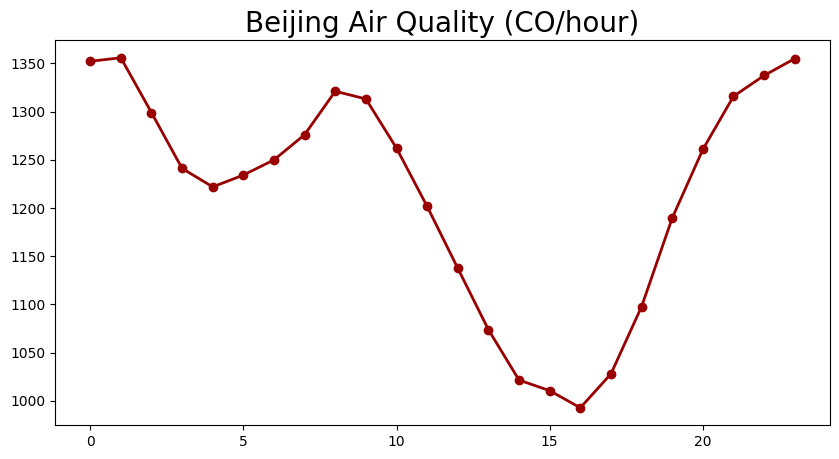

In [38]:
plt.figure(figsize=(10,5))
plt.plot(
    df.groupby(by="hour")["CO"].mean().sort_index(ascending=True),
    marker='o', 
    linewidth=2,
    color="#990000"
)
plt.title("Beijing Air Quality (CO/hour)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

## Pertanyaan 4: Distrik mana di Beijing yang memiliki kadar CO terendah?

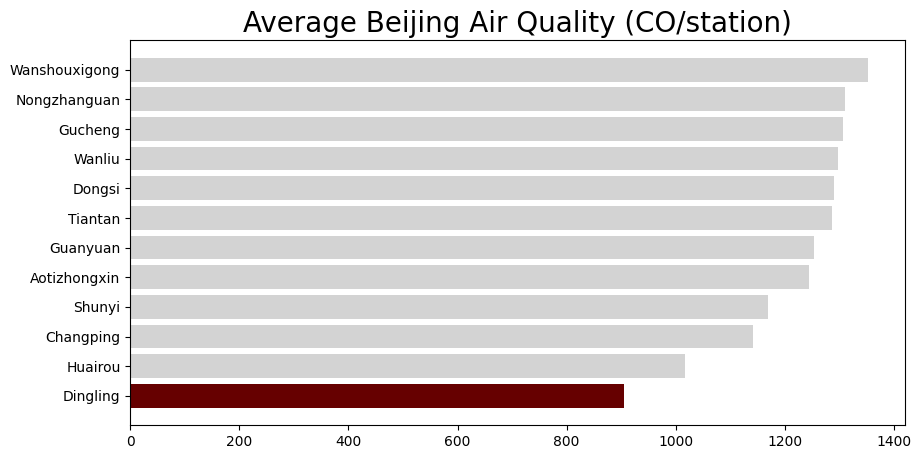

In [39]:
plt.figure(figsize=(10,5))
colors_ = ["#660000", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", 
           "#D3D3D3", "#D3D3D3", "#D3D3D3"]
plt.barh(
    df.groupby("station")["CO"].mean().sort_values().index,
    df.groupby("station")["CO"].mean().sort_values(),
    color = colors_
)
plt.title("Average Beijing Air Quality (CO/station)", loc="center", fontsize=20)
plt.show()

# Conclusion
* Berdasarkan parameter CO kualitas udara di Beijing menunjukkan tren kualitas udara yang memburuk terutama mulai dari tahun 2016 terjadi lonjakan peningkatan CO
* Pukul 14.00 - 16.00 merupakan waktu dengan jumlah CO di udara paling rendah
* Sedangkan mulai pukul 16.00 hingga dini hari merupakan waktu dengan peningkatan CO
* Berdasarkan parameter CO distrik yang memiliki kadar CO terendah adalah Distrik Dingling dengan rata-rata kadar CO sebesar 904,6.

In [40]:
df.to_csv("df.csv", index=False)